# Dependencies

In [1]:
import spacy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")

# Loading the Raw text of _Pride and Prejudice_

In [2]:
pride_and_prejudice_raw_text = open('dataset/Pride_and_Prejudice.txt').read()
pride_and_prejudice_raw_text[:1000]

'\ufeffIt is a truth universally acknowledged, that a single man in possession\nof a good fortune, must be in want of a wife.\n\nHowever little known the feelings or views of such a man may be on his\nfirst entering a neighbourhood, this truth is so well fixed in the minds\nof the surrounding families, that he is considered the rightful property\nof some one or other of their daughters.\n\n“My dear Mr. Bennet,” said his lady to him one day, “have you heard that\nNetherfield Park is let at last?”\n\nMr. Bennet replied that he had not.\n\n“But it is,” returned she; “for Mrs. Long has just been here, and she\ntold me all about it.”\n\nMr. Bennet made no answer.\n\n“Do you not want to know who has taken it?” cried his wife impatiently.\n\n“_You_ want to tell me, and I have no objection to hearing it.”\n\nThis was invitation enough.\n\n“Why, my dear, you must know, Mrs. Long says that Netherfield is taken\nby a young man of large fortune from the north of England; that he came\ndown on Mond

# Loading the large english model 

In [3]:
nlp = spacy.load("en_core_web_lg")

# Producing the _DOC_ object 

![Alt text](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

In [4]:
pride = nlp(pride_and_prejudice_raw_text)

spaCy has already tokenized the whole raw text into words

In [5]:
pride[0]

﻿It

In [6]:
pride[:10]

﻿It is a truth universally acknowledged, that a single

# Sentences

### Irerate over sentences

In [7]:
next(pride.sents)

﻿It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.


In [8]:
prideSents = list(pride.sents)
prideSents[-1]

Darcy, as well as Elizabeth, really loved them; and they were both ever
sensible of the warmest gratitude towards the persons who, by bringing
her into Derbyshire, had been the means of uniting them.

### find the longest sentence in _Pride and Prejudice_

In [9]:
prideSentenceLengths = [len(sent) for sent in prideSents]
prideSents[np.argmax(prideSentenceLengths)]

About a year ago, she was taken from school, and an establishment formed
for her in London; and last summer she went with the lady who presided
over it, to Ramsgate; and thither also went Mr. Wickham, undoubtedly by
design; for there proved to have been a prior acquaintance between him
and Mrs. Younge, in whose character we were most unhappily deceived; and
by her connivance and aid, he so far recommended himself to Georgiana,
whose affectionate heart retained a strong impression of his kindness to
her as a child, that she was persuaded to believe herself in love, and
to consent to an elopement.

# Words

Get one word

In [10]:
a_word = pride[4]
a_word

universally

### List of word properties

In [11]:
[prop for prop in dir(a_word) if not prop.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_extension',
 'has_vector',
 'head',
 'i',
 'idx',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'morph',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'shape',
 'shape_',
 'similarity',
 'string',
 'subtree',
 'suffix',
 'suffix_',
 'tag',
 

### Create a lexical dispersion plot for the occurrences of several characters

#### Index of a word

In [12]:
a_word.i

4

In [13]:
name = 'Elizabeth'
index_occurences = [word.i for word in pride if word.text.lower() == name.lower()]
index_occurences[:10]

[1280, 3201, 3532, 3621, 3729, 4394, 4481, 4898, 5985, 6750]

In [14]:
np.histogram(index_occurences, bins=50)

(array([ 5,  6, 10, 18, 15, 13, 21,  6,  7, 12, 16, 11, 13, 13, 14, 12, 16,
        10, 18, 17, 14, 16, 17,  7,  7,  1,  5, 17,  8, 13, 18, 18, 20, 20,
         9, 11, 13,  9, 13,  5, 14,  4, 13, 14, 20, 16, 19, 11, 11, 17]),
 array([  1280.  ,   4362.36,   7444.72,  10527.08,  13609.44,  16691.8 ,
         19774.16,  22856.52,  25938.88,  29021.24,  32103.6 ,  35185.96,
         38268.32,  41350.68,  44433.04,  47515.4 ,  50597.76,  53680.12,
         56762.48,  59844.84,  62927.2 ,  66009.56,  69091.92,  72174.28,
         75256.64,  78339.  ,  81421.36,  84503.72,  87586.08,  90668.44,
         93750.8 ,  96833.16,  99915.52, 102997.88, 106080.24, 109162.6 ,
        112244.96, 115327.32, 118409.68, 121492.04, 124574.4 , 127656.76,
        130739.12, 133821.48, 136903.84, 139986.2 , 143068.56, 146150.92,
        149233.28, 152315.64, 155398.  ]))

In [15]:
def location_histogram(name, novel): 
    """ 
    Make a list of locations, bin those into a histogram, 
    """
    index_occurences = [word.i for word in pride if word.text.lower() == name.lower()]
    histogram_occurences = np.histogram([word.i for word in novel if word.text.lower() == name], bins=50)
    return histogram_occurences[0] # only occurences and not the split values of each bin

In [16]:
dataframe_occurences = pd.DataFrame({name: location_histogram(name.lower(), pride) for name in ['Elizabeth', 'Darcy', 'Jane', 'Bennet']})
dataframe_occurences.head(5)

,Elizabeth,Darcy,Jane,Bennet
0,5,14,3,20
1,6,8,7,13
2,10,9,9,2
3,18,11,16,14
4,15,14,4,10


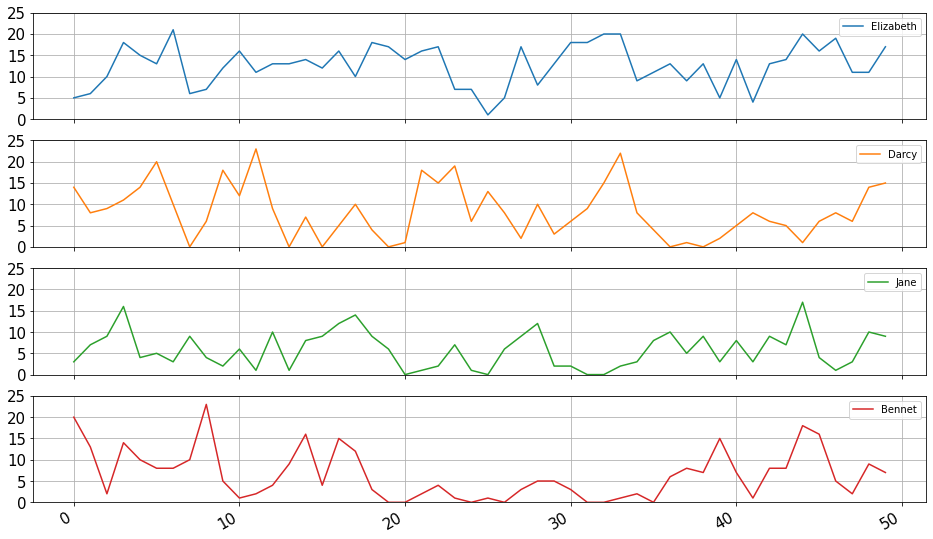

In [17]:
dataframe_occurences.plot(subplots=True, figsize=(16,10), grid=True, ylim=(0,25),
                          fontsize=15)
plt.show()

**Based on this plot, which characters end up getting together at the end ?**

# Named Entities

In [18]:
set([w.label_ for w in pride.ents])

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

### Place names 

In [19]:
set([ent.string.strip() for ent in pride.ents if ent.label_ == 'GPE'])

{'Barnet',
 'Birmingham',
 'Blenheim',
 'Brighton',
 'Cambridge',
 'Charlotte',
 'Chatsworth',
 'Cheapside',
 'Clapham',
 'Derbyshire',
 'Eastbourne',
 'Edward-street',
 'England',
 'Great Britain',
 'Hatfield',
 'Hertfordshire',
 'Hunsford',
 'Kenilworth',
 'Kent',
 'Kitty',
 'Kympton',
 'Lambton',
 'Liverpool',
 'London',
 'Longbourn',
 'Lucas Lodge',
 'Matlock',
 'Meryton',
 'Miss',
 'Netherfield',
 'Newcastle',
 'Oxford',
 'Pemberley',
 'Ramsgate',
 'Scarborough',
 'Scotland',
 'St. James',
 'St. James’s',
 'Stoke',
 'Warwick',
 'Westerham',
 'York',
 'china',
 'morrow'}

### Organisations

In [20]:
set(list([ent.string.strip() for ent in pride.ents if ent.label_ == 'ORG']))

{'Ashworth',
 'Bakewell',
 'Bell',
 'Bingley',
 'Clapham',
 'Commerce',
 'Fordyce’s Sermons',
 'Grantley',
 'Gretna',
 'Gretna Green',
 'Haggerston',
 'Hertfordshire',
 'Hunsford',
 'Hunsford Parsonage',
 'Hursts',
 'Kent',
 'Kitty',
 'Kitty’s',
 'Lambton',
 'Longbourn House',
 'Lucases’',
 'Meryton',
 'Miss',
 'Miss\nBennet',
 'Miss\nDarcy',
 'Netherfield',
 'Netherfield House',
 'Parsonage',
 'Parsonage House',
 'Peak',
 'Pemberley',
 'Pemberley House',
 'Philips',
 'Rosings',
 'Scotch',
 'The Times',
 'Thoughtlessness',
 'Wickham',
 'cambric',
 'caprice',
 'felicity',
 'imperturbably',
 'piquet',
 'the\nregiment',
 'the Church of England',
 'the Little Theatre',
 'the Miss Bennets',
 'the War Office',
 'unaffectedly civil',
 '\ufeffIt'}

### Group of people

In [21]:
set([ent.string for ent in pride.ents if ent.label_ == 'NORP'])

{'British ',
 'Christian',
 'French',
 'Gardiners ',
 'Hertfordshire ',
 'Irish ',
 'Italian ',
 'Longbourn',
 'Longbourn ',
 'Lucases',
 'Lucases ',
 'Netherfield ',
 'Pemberley ',
 'Spanish ',
 'unaffectedly '}

### Most common occurences 

In [22]:
Counter([w.string.strip() for w in pride.ents if w.label_ == 'PERSON']).most_common(10)

[('Elizabeth', 622),
 ('Darcy', 411),
 ('Jane', 290),
 ('Bennet', 270),
 ('Bingley', 217),
 ('Wickham', 185),
 ('Collins', 179),
 ('Lydia', 167),
 ('Lizzy', 95),
 ('Gardiner', 94)]

### Displaying NE for a sentence

In [23]:
from spacy import displacy

longest_sentence = prideSents[np.argmax(prideSentenceLengths)]
displacy.render(longest_sentence, style="ent", jupyter=True)

# Part-of-Speech tags

In [24]:
tagDict = {w.pos: w.pos_ for w in pride} 
tagDict

{92: 'NOUN',
 87: 'AUX',
 90: 'DET',
 86: 'ADV',
 100: 'VERB',
 97: 'PUNCT',
 98: 'SCONJ',
 84: 'ADJ',
 85: 'ADP',
 103: 'SPACE',
 89: 'CCONJ',
 95: 'PRON',
 93: 'NUM',
 96: 'PROPN',
 94: 'PART',
 91: 'INTJ',
 101: 'X'}

### distribution of part-of-speech tags

In [25]:
pridePOS = pd.Series(pride.count_by(spacy.attrs.POS)) / len(pride)
pridePOS.index = list(tagDict.values())
pridePOS

NOUN     0.113268
AUX      0.056744
DET      0.095731
ADV      0.057554
VERB     0.114780
PUNCT    0.135085
SCONJ    0.022459
ADJ      0.050857
ADP      0.086840
SPACE    0.068954
CCONJ    0.032129
PRON     0.087277
NUM      0.004362
PROPN    0.042281
PART     0.029427
INTJ     0.001988
X        0.000264
dtype: float64

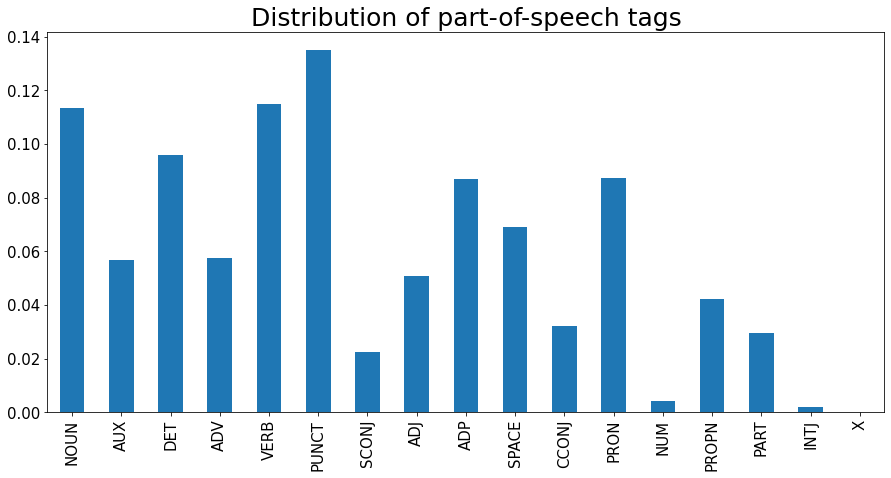

In [26]:
plt.title("Distribution of part-of-speech tags", fontsize=25)
pridePOS.plot(kind='bar', figsize=(15,7), fontsize=15)
plt.show()

### Most common occurences

In [27]:
Counter([w.string.strip() for w in pride if w.pos_ == 'PRON']).most_common(10)

[('I', 2063),
 ('she', 1383),
 ('it', 1286),
 ('you', 1149),
 ('he', 1098),
 ('her', 775),
 ('him', 764),
 ('they', 477),
 ('me', 444),
 ('them', 435)]

# Dependency Parsing

Select a sentence

In [28]:
a_sentence = prideSents[100]
a_sentence

“What can be the meaning of that emphatic exclamation?” cried he.

### List of sentence properties

In [29]:
[prop for prop in dir(a_sentence) if not prop.startswith('_')]

['as_doc',
 'char_span',
 'conjuncts',
 'doc',
 'end',
 'end_char',
 'ent_id',
 'ent_id_',
 'ents',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'kb_id',
 'kb_id_',
 'label',
 'label_',
 'lefts',
 'lemma_',
 'lower_',
 'merge',
 'n_lefts',
 'n_rights',
 'noun_chunks',
 'orth_',
 'remove_extension',
 'rights',
 'root',
 'sent',
 'sentiment',
 'set_extension',
 'similarity',
 'start',
 'start_char',
 'string',
 'subtree',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'upper_',
 'vector',
 'vector_norm',
 'vocab']

In [30]:
displacy.render(a_sentence, style="dep", jupyter=True)

### Word children

In [31]:
for word in a_sentence: 
    print(word, ': ', str(list(word.children)))

“ :  []
What :  []
can :  []
be :  [“, What, can, meaning]
the :  []
meaning :  [the, of]
of :  [exclamation]
that :  []
emphatic :  []
exclamation :  [that, emphatic]
? :  []
” :  []
cried :  [be, ?, ”, he, .]
he :  []
. :  []


**Since adjectives are typically children of the things they describe, we can get approximations for adjectives that describe characters.**

In [32]:
def adjectivesDescribingCharacters(text, character):
    sents = [sent for sent in text.sents if character in sent.string]
    adjectives = []
    for sent in sents: 
        for word in sent: 
            if character in word.string:
                for child in word.children: 
                    if child.pos_ == 'ADJ': 
                        adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(10)

In [33]:
adjectivesDescribingCharacters(pride, 'Elizabeth')

[('dear', 5),
 ('easy', 1),
 ('wilful', 1),
 ('ashamed', 1),
 ('sighted', 1),
 ('loveliest', 1),
 ('affected', 1)]

In [34]:
adjectivesDescribingCharacters(pride, 'Darcy')

[('late', 7),
 ('present', 1),
 ('superior', 1),
 ('abominable', 1),
 ('poor', 1),
 ('handsome', 1),
 ('little', 1),
 ('disagreeable', 1)]

# Word Embeddings (Word Vectors)

let's get the most common 50 nouns in the novel

In [35]:
most_common_nouns = Counter([word.string.strip() for word in pride if word.pos_.startswith('N')]).most_common(50)
most_common_nouns[:10]

[('_', 442),
 ('one', 244),
 ('sister', 218),
 ('time', 203),
 ('family', 151),
 ('man', 150),
 ('room', 150),
 ('day', 142),
 ('mother', 136),
 ('father', 134)]

In [36]:
most_common_nouns_labels = [counter_tuple[0] for counter_tuple in most_common_nouns]
prideNounVecs = [nlp(word).vector for word in most_common_nouns_labels]
prideNounVecs[1].shape

(300,)

### Linear dimensionality reduction

In [37]:
from sklearn.decomposition import TruncatedSVD

lsa = TruncatedSVD(n_components=2)
lsaOut = lsa.fit_transform(prideNounVecs)

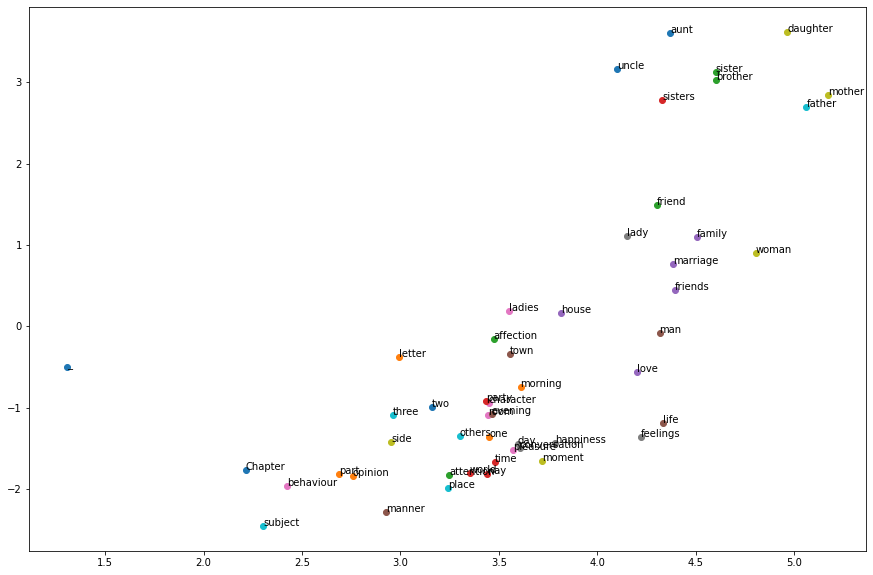

In [38]:
plt.figure(figsize=(15,10))
xs, ys = lsaOut[:,0], lsaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(most_common_nouns_labels[i], (xs[i], ys[i]))